### Importing the Libraries

In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import numpy as np

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=aef81be96732ac580f85ef235bb7b34cbb5fab68ebbd34d14408c8dc1aa9291d
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [ ]:
from mtcnn.mtcnn import MTCNN

### Creating the FACELOADING Class

In [ ]:
class FACELOADING:
  def __init__(self, directory): # constructor
    self.directory = directory
    self.target_size = (160, 160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename): # Feature Extraction - extractng the faces
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x,y,w,h = self.detector.detect_faces(img)[0]['box']
    x,y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, self.target_size)
    return face_arr

  def load_faces(self, dir): # Loading the faces extracted
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES

  def load_classes(self): # Loading the Classes
    for subdir in os.listdir(self.directory):
      path = self.directory + '/' + subdir + '/'
      faces = self.load_faces(path)
      labels = [subdir for _ in range(len(faces))]
      print(f'Loaded successfully: {len(labels)}')
      self.X.extend(faces)
      self.Y.extend(labels)
    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self): # Plotting the faces
    plt.figure(figsize=(18,16))
    for num, image in enumerate(self.X):
      ncols = 3
      nrows = len(self.Y)//ncols+1
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')

In [ ]:
#Loading the Originial Images folder which contains the face images
faceloading = FACELOADING('/content/drive/MyDrive/face_dataset/Original Images')
X, Y = faceloading.load_classes()

Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 24
Loaded successfully: 33
Loaded successfully: 22
Loaded successfully: 24
Loaded successfully: 8
Loaded successfully: 22
Loaded successfully: 24
Loaded successfully: 33
Loaded successfully: 22
Loaded successfully: 24
Loaded successfully: 22
Loaded successfully: 22
Loaded successfully: 21
Loaded successfully: 22
Loaded successfully: 21
Loaded successfully: 22
Loaded successfully: 26
Loaded successfully: 27
Loaded successfully: 16
Loaded successfully: 19
Loaded successfully: 22


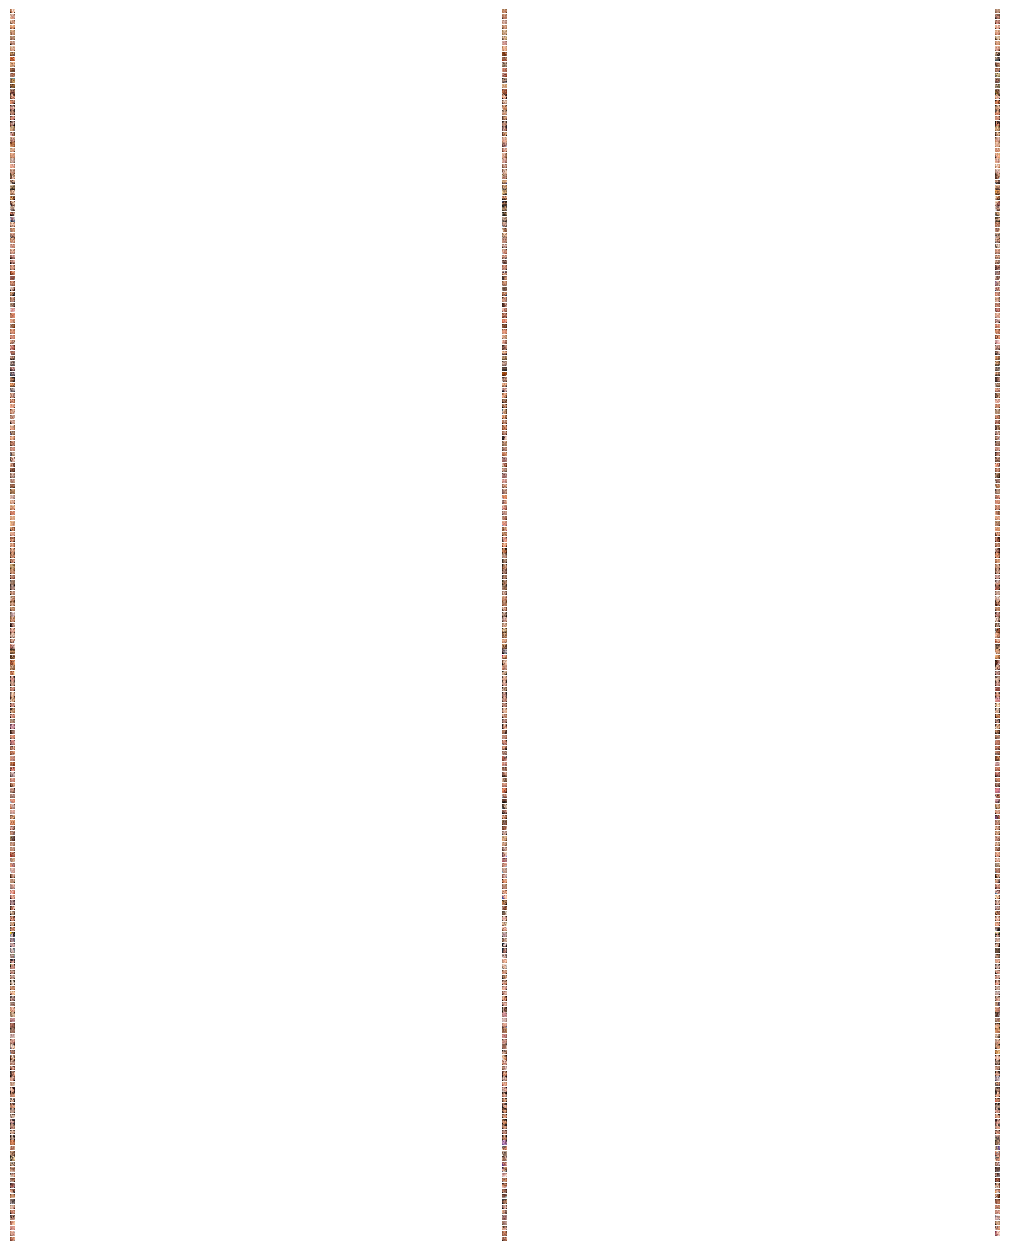

In [ ]:
faceloading.plot_images()

### Using FaceNet

In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32')
    face_img = np.expand_dims(face_img, axis=0)
    # 4D - (160X160X3)
    yhat = embedder.embeddings(face_img)
    return yhat[0] #512D Image (1X1X512)

In [ ]:
EMBEDDED_X = []
# Generating Face Embeddings
for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
# Saving Face Embeddings
np.savez_compressed('face_embeddings.npz', EMBEDDED_X, Y)

### SVM Model

In [ ]:
from sklearn.preprocessing import LabelEncoder # Label Encoding the Class Names

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
Y

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 26, 26,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22

In [ ]:
# Splitting the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_preds_train = model.predict(X_train)
y_preds_test = model.predict(X_test)

### Evaluation - Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, y_preds_train)

1.0

In [ ]:
accuracy_score(Y_test, y_preds_test)

1.0

In [ ]:
detector = MTCNN()

### Testing on a different Image

In [ ]:
t_im = cv.imread('/content/drive/MyDrive/faces/test_dataset/WhatsApp Image 2024-05-15 at 20.10.07_7cce50ee.jpg')
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160, 160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [ ]:
test_im = [test_im]
y_preds = model.predict(test_im)

In [ ]:
encoder.inverse_transform(y_preds) # correct class name

array(['Kritika'], dtype='<U18')